### Stock Price Predictions with Machine Learning

In [1]:
import numpy as np
import pandas as pd
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv("AAPL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-01,37.275002,37.555000,37.102501,37.512501,35.609295,141474400
1,2017-08-02,39.820000,39.937500,39.040001,39.285000,37.291874,279747200
2,2017-08-03,39.262501,39.302502,38.755001,38.892502,36.919292,108389200
3,2017-08-04,39.017502,39.349998,38.922501,39.097500,37.113876,82239600
4,2017-08-07,39.264999,39.730000,39.167500,39.702499,37.688194,87481200


In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1113 non-null   object 
 1   Open       1113 non-null   float64
 2   High       1113 non-null   float64
 3   Low        1113 non-null   float64
 4   Close      1113 non-null   float64
 5   Adj Close  1113 non-null   float64
 6   Volume     1113 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 61.0+ KB


In [6]:
df=data
df['difference']= data['High']-data['Low']

result=[]
for open,close in zip(data['Open'],data['Close']):
    if (open > close): 
        result.append(0)
    else: 
        result.append(1)
df['Result']=result

In [7]:
df['Result'].value_counts()

1    594
0    519
Name: Result, dtype: int64

<AxesSubplot:xlabel='Result', ylabel='count'>

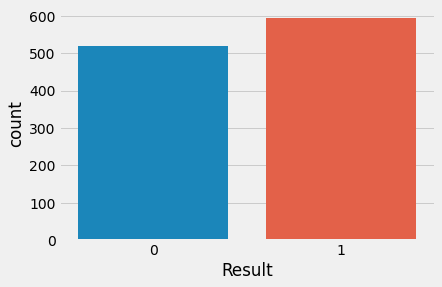

In [8]:
sns.countplot(x='Result',data=df)

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,difference,Result
0,2017-08-01,37.275002,37.555000,37.102501,37.512501,35.609295,141474400,0.452499,1
1,2017-08-02,39.820000,39.937500,39.040001,39.285000,37.291874,279747200,0.897499,0
2,2017-08-03,39.262501,39.302502,38.755001,38.892502,36.919292,108389200,0.547501,0
3,2017-08-04,39.017502,39.349998,38.922501,39.097500,37.113876,82239600,0.427497,1
4,2017-08-07,39.264999,39.730000,39.167500,39.702499,37.688194,87481200,0.562500,1
...,...,...,...,...,...,...,...,...,...
1108,2021-12-23,175.850006,176.850006,175.270004,176.279999,176.279999,68356600,1.580002,1
1109,2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600,3.349991,1
1110,2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300,2.800003,0
1111,2021-12-29,179.330002,180.630005,178.139999,179.380005,179.380005,62348900,2.490006,1


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,difference,Result
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03,1113.000000,1113.000000
mean,79.711094,80.606018,78.862767,79.777886,78.689291,1.230292e+08,1.743250,0.533693
std,40.366473,40.844018,39.891479,40.396540,40.851107,5.704093e+07,1.465749,0.499088
min,35.994999,36.430000,35.500000,35.547501,34.508709,4.100000e+07,0.212502,0.000000
25%,45.880001,46.235001,45.302502,45.932499,44.448593,8.456650e+07,0.694999,0.000000
50%,58.647499,59.395000,58.299999,58.820000,57.785587,1.088292e+08,1.275002,1.000000
75%,120.500000,122.169998,119.000000,120.879997,120.011826,1.455380e+08,2.370010,1.000000
max,181.119995,182.130005,178.529999,180.330002,180.330002,4.265100e+08,12.809998,1.000000


In [11]:
df1=df.reset_index()['Close']

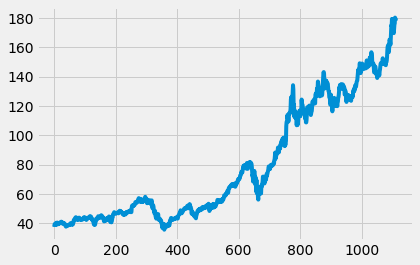

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'difference', 'Result'],
      dtype='object')

In [14]:
x = df['Date']
y = df['Close']

In [15]:
def df_plot(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(38,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

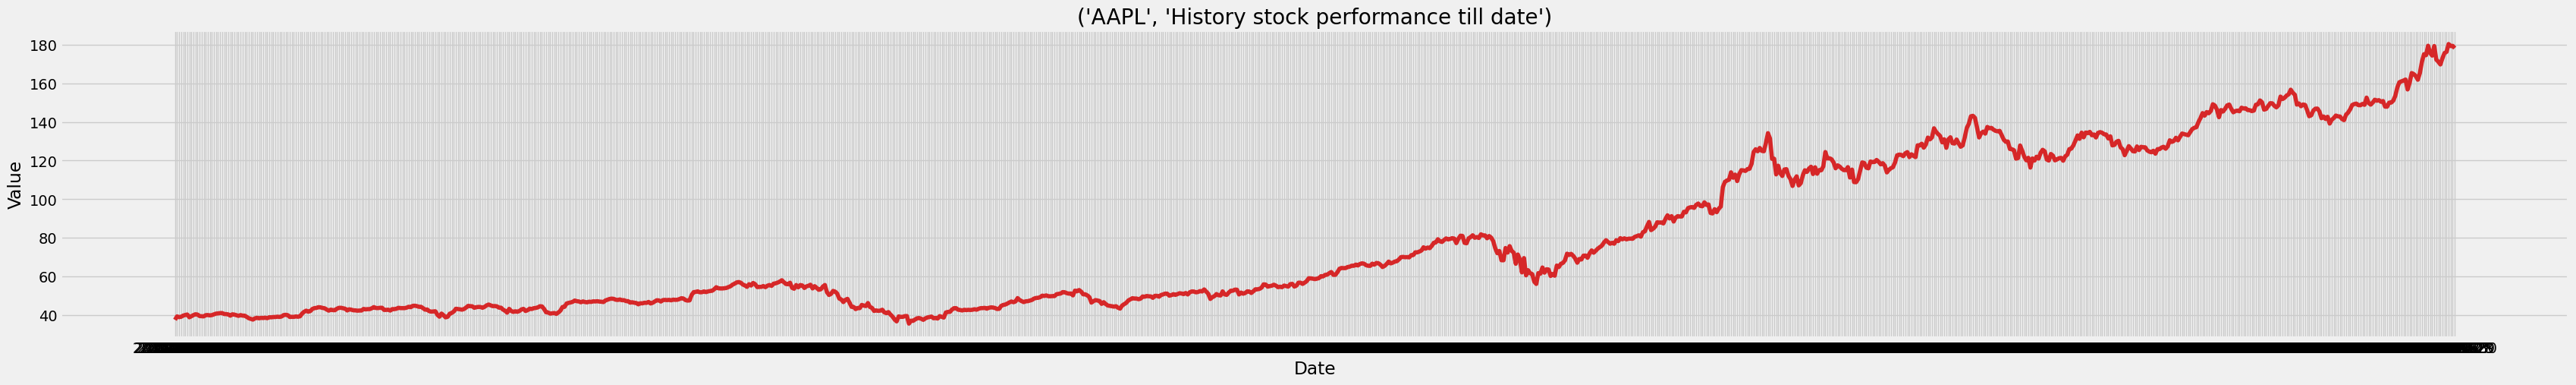

In [16]:
stock_name= "AAPL"
title = (stock_name,"History stock performance till date")

df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [17]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'difference', 'Result'],
      dtype='object')

In [18]:
df['Date'] = pd.to_datetime(df.Date)

In [19]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,difference,Result
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03,1113.000000,1113.000000
mean,79.711094,80.606018,78.862767,79.777886,78.689291,1.230292e+08,1.743250,0.533693
std,40.366473,40.844018,39.891479,40.396540,40.851107,5.704093e+07,1.465749,0.499088
min,35.994999,36.430000,35.500000,35.547501,34.508709,4.100000e+07,0.212502,0.000000
25%,45.880001,46.235001,45.302502,45.932499,44.448593,8.456650e+07,0.694999,0.000000
50%,58.647499,59.395000,58.299999,58.820000,57.785587,1.088292e+08,1.275002,1.000000
75%,120.500000,122.169998,119.000000,120.879997,120.011826,1.455380e+08,2.370010,1.000000
max,181.119995,182.130005,178.529999,180.330002,180.330002,4.265100e+08,12.809998,1.000000


<AxesSubplot:>

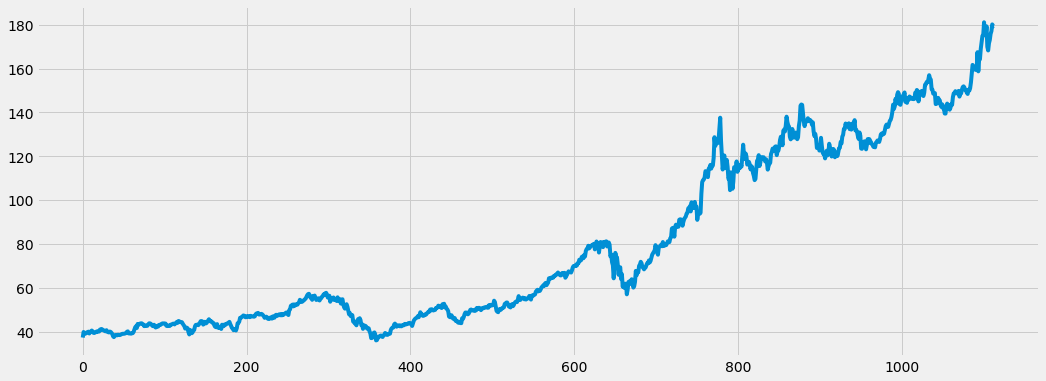

In [20]:
df['Open'].plot(figsize=(16,6))

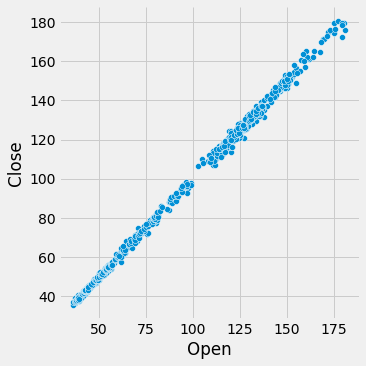

In [21]:
sns.relplot(x="Open", y="Close", data=df, kind="scatter");

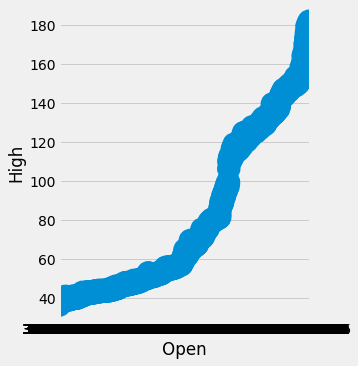

In [22]:
sns.catplot(x="Open", y="High", data=df, kind="point")

In [23]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,difference,Result
Open,1.000000,0.999781,0.999690,0.999455,0.999427,-0.193041,0.652183,-0.014945
High,0.999781,1.000000,0.999619,0.999715,0.999693,-0.185283,0.660231,-0.004840
Low,0.999690,0.999619,1.000000,0.999725,0.999702,-0.203280,0.639252,-0.004219
Close,0.999455,0.999715,0.999725,1.000000,0.999974,-0.195089,0.649406,0.006717
Adj Close,0.999427,0.999693,0.999702,0.999974,1.000000,-0.194768,0.649423,0.006575
Volume,-0.193041,-0.185283,-0.203280,-0.195089,-0.194768,1.000000,0.369408,-0.067341
difference,0.652183,0.660231,0.639252,0.649406,0.649423,0.369408,1.000000,-0.020041
Result,-0.014945,-0.004840,-0.004219,0.006717,0.006575,-0.067341,-0.020041,1.000000


In [24]:
df. describe(include='all')

<ipython-input-24-8903b3052dc3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df. describe(include='all')


,Date,Open,High,Low,Close,Adj Close,Volume,difference,Result
count,1113,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03,1113.000000,1113.000000
unique,1113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,79.711094,80.606018,78.862767,79.777886,78.689291,1.230292e+08,1.743250,0.533693
std,NaN,40.366473,40.844018,39.891479,40.396540,40.851107,5.704093e+07,1.465749,0.499088
min,NaN,35.994999,36.430000,35.500000,35.547501,34.508709,4.100000e+07,0.212502,0.000000
25%,NaN,45.880001,46.235001,45.302502,45.932499,44.448593,8.456650e+07,0.694999,0.000000


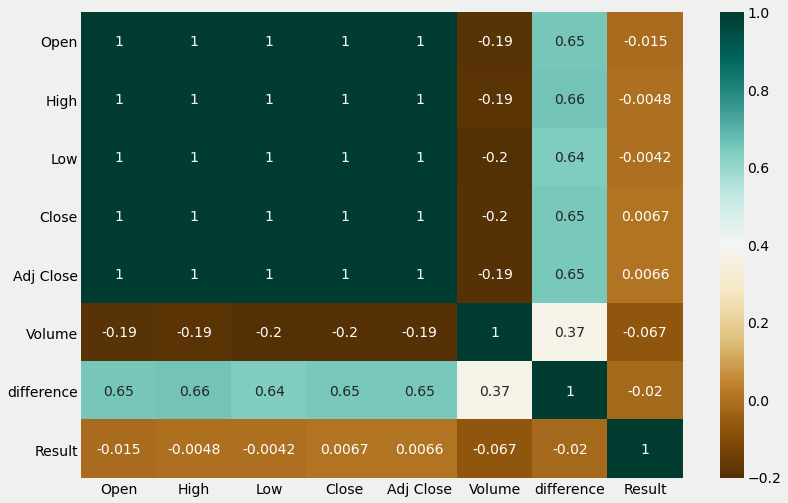

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='BrBG',annot=True)
plt.show()

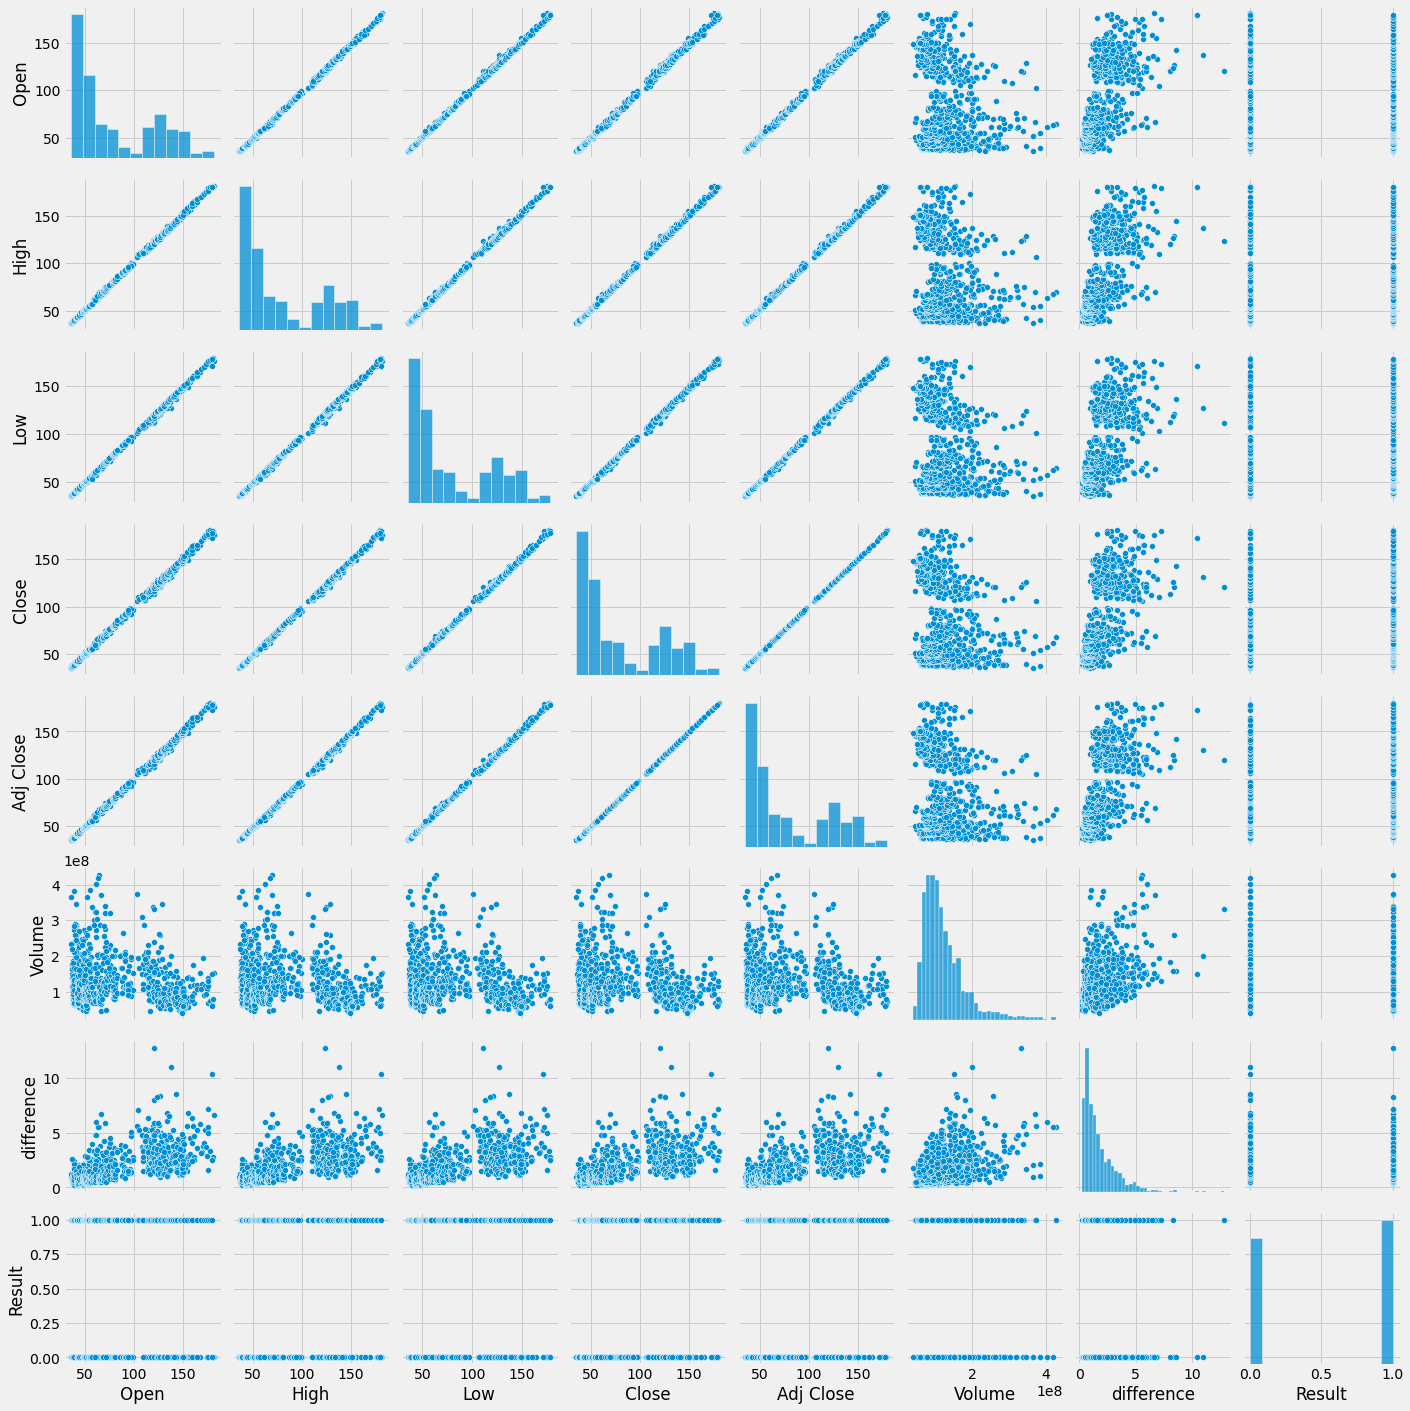

In [26]:
sns.pairplot(df)

In [27]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'difference', 'Result'],
      dtype='object')

In [28]:
X= df[['Open', 'High', 'Low','Volume']]
y=df['Adj Close']
         

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)

In [30]:
X_train.shape

(834, 4)

In [31]:
X_test.shape

(279, 4)

### Linear Regression

In [32]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
lm= linear_model.LinearRegression()

In [34]:
lm.fit(X_train,y_train)

LinearRegression()

In [35]:
print(lm.coef_)

[-5.95451723e-01  9.11764785e-01  6.92549699e-01 -1.76348851e-09]


In [36]:
print(lm.intercept_)

-1.7555945713748287


In [37]:
predict= lm.predict(X_test)

In [38]:
print(X_test)

            Open        High         Low     Volume
877   143.600006  144.300003  141.369995   98390600
425    49.669998   50.185001   49.544998   86781200
186    41.000000   41.082500   40.157501  142623200
1089  159.570007  160.449997  156.360001   76959800
748    96.692497   97.974998   96.602501   89001600
...          ...         ...         ...        ...
581    66.385002   66.519997   65.099998  106234400
907   121.690002  122.169998  119.449997  111943300
264    53.360001   54.487499   53.290001  141708000
993   144.029999  147.460007  143.630005  100827100
101    43.669998   43.855000   43.625000   65397600

[279 rows x 4 columns]


In [39]:
predict.shape

(279,)

In [40]:
dframe=pd.DataFrame(y_test,predict)

In [41]:
dfr= pd.DataFrame({'Actual Price':y_test,'Predicted Price':predict})

In [42]:
print(dfr)

      Actual Price  Predicted Price
877     142.282852       142.037432
425      48.898159        48.584572
186      38.969707        38.848012
1089    156.809998       157.672181
748      96.336296        96.743924
...            ...              ...
581      64.834442        64.263573
907     119.423073       119.701835
264      52.621830        52.806957
993     145.210190       146.223445
101      41.845703        42.323627

[279 rows x 2 columns]


In [43]:
lm.score(X_test,y_test)

0.9997576110106915

In [44]:
import math

In [45]:
print("Mean absolute error",metrics.mean_absolute_error(y_test,predict))

Mean absolute error 0.49943590927331855


In [46]:
print("Mean squared error",metrics.mean_squared_error(y_test,predict))

Mean squared error 0.39533564070839333


In [47]:
print("Root Mean error",math.sqrt(metrics.mean_squared_error(y_test,predict)))

Root Mean error 0.6287572192097625


In [48]:
graph= dfr.head(30)

<AxesSubplot:>

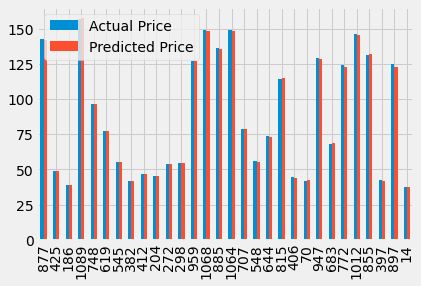

In [49]:
graph.plot(kind='bar')

### Ridge Regression

In [50]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

folds = 5

In [52]:
model_cv= GridSearchCV(
    estimator = ridge,
    param_grid = params,
    scoring= 'neg_mean_absolute_error',
    cv = folds,
    return_train_score=True,
    verbose = 1
)

model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.18116e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=6.5808e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=6.50823e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.24183e-17): result may not be accurate.
  return linalg.solve(A, Xy,

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=6.51829e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.25211e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.02504e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.19428e-17): result may not be accurate.
  return linalg.solve(A, Xy

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=6.70958e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.44739e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.2092e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.41076e-17): result may not be accurate.
  return linalg.solve(A, Xy,

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
cv_results=pd.DataFrame(model_cv.cv_results_)

cv_results = cv_results[cv_results['param_alpha']<= 200]

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014222,0.021332,0.002143,0.000539,0.0001,{'alpha': 0.0001},-0.555310,-0.542734,-0.521126,-0.460159,...,-0.514744,0.034245,1,-0.498186,-0.500703,-0.507908,-0.524780,-0.519123,-0.510140,0.010315
1,0.001865,0.000450,0.001287,0.000394,0.001,{'alpha': 0.001},-0.555310,-0.542734,-0.521126,-0.460159,...,-0.514744,0.034245,2,-0.498186,-0.500704,-0.507908,-0.524780,-0.519123,-0.510140,0.010315
2,0.002527,0.000820,0.001199,0.000397,0.01,{'alpha': 0.01},-0.555311,-0.542734,-0.521132,-0.460158,...,-0.514746,0.034245,3,-0.498188,-0.500706,-0.507910,-0.524783,-0.519125,-0.510142,0.010315
3,0.002887,0.001160,0.001226,0.000387,0.05,{'alpha': 0.05},-0.555315,-0.542733,-0.521156,-0.460154,...,-0.514756,0.034245,4,-0.498197,-0.500718,-0.507917,-0.524794,-0.519133,-0.510152,0.010315
4,0.002724,0.000626,0.001657,0.000596,0.1,{'alpha': 0.1},-0.555321,-0.542732,-0.521186,-0.460148,...,-0.514768,0.034246,5,-0.498208,-0.500733,-0.507926,-0.524808,-0.519142,-0.510163,0.010315


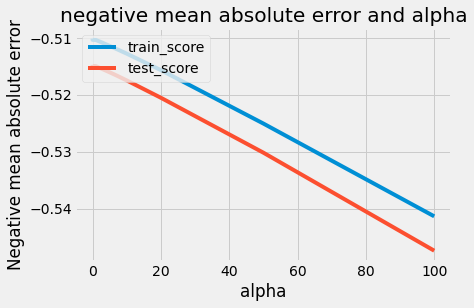

In [54]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype(int)

plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title("negative mean absolute error and alpha")
plt.legend(['train_score','test_score'],loc='upper left')
plt.show()

In [55]:
model_cv.score(X_test,y_test)

-0.4994359163280742

### Lasso Regression

In [56]:
lasso = Lasso()

model_cv= GridSearchCV(
    estimator = lasso,
    param_grid = params,
    scoring= 'neg_mean_absolute_error',
    cv = folds,
    return_train_score=True,
    verbose = 1
)

model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.097e+02, tolerance: 1.123e+02
  model = cd_fast.enet_coordinate_descent(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.163e+02, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.757e+02, tolerance: 1.062e+02
  model = cd_fast.enet_coordinate_descent(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.768e+02, tolerance: 1.127e+02
  model = cd_fast.enet_coordinate_descent(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.746e+02, tolerance: 1.127e+02
  model = cd_fast.enet_coordinate_descent(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.833e+02, tolerance: 1.123e+02
  model = cd_fast.enet_coordinate_descent(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.521e+02, tolerance: 1.062e+02
  model = cd_fast.enet_coordinate_descent(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.266e+02, tolerance: 1.127e+02
  model = cd_fast.enet_coordinate_descent(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.206e+02, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.206e+02, tolerance: 1.111e+02
  model = cd_fast.enet_coordinate_descent(
c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015506,0.019016,0.002840,0.000779,0.0001,{'alpha': 0.0001},-0.719741,-0.660631,-0.835891,-0.751520,...,-0.767168,0.075823,1,-0.754186,-0.768848,-0.747324,-0.747707,-0.760204,-0.755654,0.008118
1,0.004851,0.001086,0.001805,0.001195,0.001,{'alpha': 0.001},-0.719743,-0.660635,-0.835894,-0.751527,...,-0.767172,0.075823,2,-0.754190,-0.768852,-0.747328,-0.747711,-0.760208,-0.755658,0.008118
2,0.005607,0.000499,0.002888,0.000684,0.01,{'alpha': 0.01},-0.719770,-0.660675,-0.835926,-0.751594,...,-0.767216,0.075825,3,-0.754229,-0.768891,-0.747366,-0.747758,-0.760250,-0.755699,0.008117
3,0.005468,0.001071,0.002052,0.000721,0.05,{'alpha': 0.05},-0.719888,-0.660855,-0.836071,-0.751894,...,-0.767409,0.075834,4,-0.754404,-0.769063,-0.747537,-0.747963,-0.760435,-0.755880,0.008112
4,0.004772,0.000659,0.002260,0.000996,0.1,{'alpha': 0.1},-0.720036,-0.661080,-0.836252,-0.752268,...,-0.767652,0.075845,5,-0.754622,-0.769280,-0.747753,-0.748220,-0.760666,-0.756108,0.008106


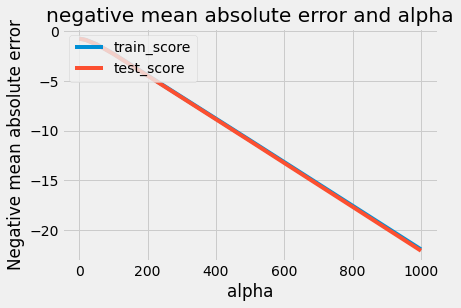

In [58]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title("negative mean absolute error and alpha")
plt.legend(['train_score','test_score'],loc='upper left')
plt.show()

In [59]:
model_cv.best_params_

{'alpha': 0.0001}

In [60]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
  
lasso.fit(X_train,y_train)

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.143e+02, tolerance: 1.393e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001)

In [61]:
lasso.coef_

array([ 4.87932721e-01,  4.27491309e-01,  9.17506671e-02, -3.40545706e-09])

### Statsmodel

In [62]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
lm_1= sm.OLS(y_train,X_train).fit() 

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.546e+05
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        02:53:58   Log-Likelihood:                -917.43
No. Observations:                 834   AIC:                             1845.
Df Residuals:                     829   BIC:                             1869.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7556      0.105    -16.772      0.0

### As we different implementation of regression and we found the linear regression give the best accuarcy score of prediction. 

In [64]:
result=pd.DataFrame(y_test,lm.predict(X_test))

In [65]:
result= pd.DataFrame({'Actual Price':y_test,'Predicted Price':predict})

In [66]:
print(result)

      Actual Price  Predicted Price
877     142.282852       142.037432
425      48.898159        48.584572
186      38.969707        38.848012
1089    156.809998       157.672181
748      96.336296        96.743924
...            ...              ...
581      64.834442        64.263573
907     119.423073       119.701835
264      52.621830        52.806957
993     145.210190       146.223445
101      41.845703        42.323627

[279 rows x 2 columns]


In [75]:
pred=lm.predict(X_test)

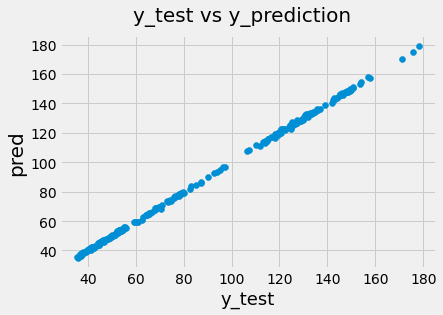

In [76]:
fig = plt.figure()
plt.scatter(y_test,pred)                          
plt.suptitle("y_test vs y_prediction",fontsize=20)            
plt.xlabel('y_test',fontsize=18)                             
plt.ylabel('pred',fontsize=20)                       
plt.show()